This colab notebook contains my NLP project based around ChatGPT sentiments.

I consider this topic to be highly interesting, as ChatGPT and it's successor GPT-4 have really broadened people's perspective to the capabilities of AI, and I have noticed family and friends expressing a variety of opinions around the matter.
 As such, I figure it is worth investigating the common consensus based on appropriate reddit communites to figure out how well the outstanding chat bot is being received.

In [29]:
import pandas as pd
import numpy as np

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
from pprint import pprint

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (8, 6)

import seaborn as sns
sns.set_theme(style="darkgrid")

import re
from google.colab import drive

In [3]:
nltk.download('vader_lexicon') #vader is designed specifically for social media interactions
nltk.download('punkt') #tokenizing
nltk.download('stopwords') #stopwords allows the tokenization and analysis of words to be more precise

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
drive.mount('/content/drive') #activating drive, so I can read in my csv file


Mounted at /content/drive


In [5]:
path = "/content/chatgpt-reddit-comments.csv"

df = pd.read_csv(path)

df.head() #assigning csv to dataframe for manipulation

,comment_id,comment_body,subreddit
0,iztdxuh,"I've been shocked for days now, I don't need c...",r/ChatGPT
1,iztn0q0,\n\nI am so angry right now. I just wasted my...,r/ChatGPT
2,izudrph,chatgpt karma whoring is here folks! just when...,r/ChatGPT
3,iztfhtb,"Worked on me, ngl.",r/ChatGPT
4,izu2as9,"Certified 10/10, must-see moment. It really di...",r/ChatGPT


The data has now been successfully loaded, now to investigate it. First, polarity scores are used to gain understanding of the sentiment behind the reddit comment.

In [6]:
sid = SentimentIntensityAnalyzer() #loads sentiment analysis tool
res = [*df['comment_body'].apply(sid.polarity_scores)] #applies sentiment analysis through polarity scores to each comment
pprint(res[:5]) # let's examine the first few comments, and see how their sentiment looks

[{'compound': -0.3182, 'neg': 0.223, 'neu': 0.777, 'pos': 0.0},
 {'compound': -0.9837, 'neg': 0.201, 'neu': 0.734, 'pos': 0.065},
 {'compound': -0.2001, 'neg': 0.151, 'neu': 0.725, 'pos': 0.124},
 {'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos': 0.0},
 {'compound': -0.4364, 'neg': 0.207, 'neu': 0.793, 'pos': 0.0}]


In [11]:
sentiment_df = pd.DataFrame.from_records(res) #creating dataframe of sentiment scores for each comment
chatGpt = pd.concat([df, sentiment_df], axis=1, join="inner")#combining dataframes to include all captured details

chatGpt["Overall"] = ''
chatGpt.loc[chatGpt.compound>0, "Overall"] = "Positive"
chatGpt.loc[chatGpt.compound==0, "Overall"] = "Neutral"
chatGpt.loc[chatGpt.compound<0, "Overall"] = "Negative"

chatGpt.head()

,comment_id,comment_body,subreddit,neg,neu,pos,compound,Overall
0,iztdxuh,"I've been shocked for days now, I don't need c...",r/ChatGPT,0.223,0.777,0.000,-0.3182,Negative
1,iztn0q0,\n\nI am so angry right now. I just wasted my...,r/ChatGPT,0.201,0.734,0.065,-0.9837,Negative
2,izudrph,chatgpt karma whoring is here folks! just when...,r/ChatGPT,0.151,0.725,0.124,-0.2001,Negative
3,iztfhtb,"Worked on me, ngl.",r/ChatGPT,0.000,1.000,0.000,0.0000,Neutral
4,izu2as9,"Certified 10/10, must-see moment. It really di...",r/ChatGPT,0.207,0.793,0.000,-0.4364,Negative


The mean negative score: 0.06852215968711246
The mean neutral score: 0.8064694266908328
The mean positive score: 0.12369304588381189


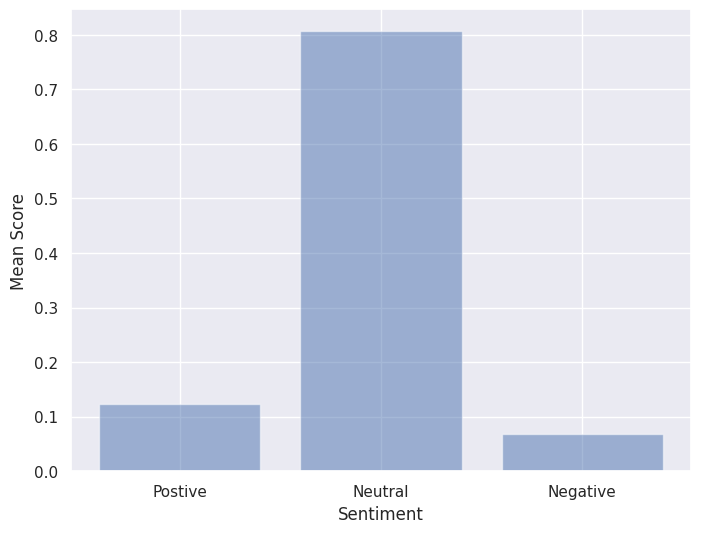

In [32]:
negAvg = chatGpt["neg"].mean()
neuAvg = chatGpt["neu"].mean()
posAvg = chatGpt["pos"].mean()
mostCommonSentiment = chatGpt["Overall"].mode()

print(f'The mean negative score: {negAvg}')
print(f'The mean neutral score: {neuAvg}')
print(f'The mean positive score: {posAvg}')

objects_ = ("Postive", "Neutral", "Negative")
y_pos = np.arange(len(objects_))
performance = [posAvg,neuAvg,negAvg]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects_)
plt.ylabel("Mean Score")
plt.xlabel("Sentiment")
plt.show()


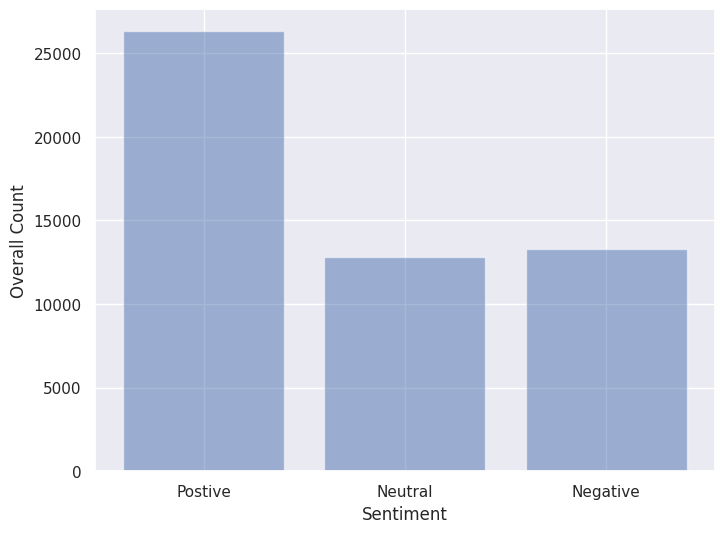

The overall consensus appears to be: Positive


In [47]:

classedPos = chatGpt[chatGpt.Overall == "Positive"].shape[0]
classedNeu = chatGpt[chatGpt.Overall == "Neutral"].shape[0]
classedNeg = chatGpt[chatGpt.Overall == "Negative"].shape[0]

objects = ("Positive", "Neutral", "Negative")
y_pos = np.arange(len(objects_))
performance = [classedPos,classedNeu,classedNeg]


plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects_)
plt.ylabel("Overall Count")
plt.xlabel("Sentiment")
plt.show()

print(f'The overall consensus appears to be: {mostCommonSentiment[0]}')


As witnessed, the dataset showcases that across the reddit communities observed in the dataset, the overall consensus appears that there is a positive view on chatGpt as of the time of the comments posting.


It is important to keep in mind how this may have changed over time, as the capabilities of chatGpt became more pronounced, and people became aware of new uses for the ai chatbot.


Future sentiment/NLP analysis conducted around the introduciton of GPT-4 would be a solid successor to this work.